1、准备工作

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False                  #用于绘图中显示中文
from mpl_toolkits.mplot3d import Axes3D                     #用于绘制三维图
from sklearn.decomposition import PCA

def normalize(x):
    data_scaled = preprocessing.scale(x)/np.sqrt(data.shape[0]/(data.shape[0]-1))
    return data_scaled

2、数据预处理

In [3]:
orig_data = pd.read_excel('D:\\Code\\PCA\\data.xlsx', index_col = 0)
                                                #读取数据，index_col声明Excel中第一列是索引
data = np.array(orig_data)                      #将dataframe转为ndarray

data_scaled = normalize(data)                   #标准化数据
data_cov = np.cov(data_scaled.T)                #求协方差

3、对特征向量进行排序

In [10]:
lamda, e = np.linalg.eig(data_cov)              #求特征值与特征向量
ix_lamda_order = np.argsort(-lamda)             #对特征值进行排序，返回索引数组
lamda_order = lamda[ix_lamda_order]             #根据索引排列特征向量

g = np.cumsum(lamda_order)
level = 0.85
s_contri = g / g[-1]
for i in range(len(s_contri)):
    if s_contri[i] > level:
        break
vector = e[:, :i+1]
print(lamda_order)

[ 4.66111835  2.08949227  1.04299402  0.5074224   0.31517008  0.1926138
  0.11438937  0.04532651  0.0314732 ]


4、降维

In [14]:
P = vector.T                        
Y = P.dot(data.T).T                 #对原始数据降维
print(P.T)                          #特征向量
print(P.dot(data_scaled.T).T)       #对标准化后的数据降维

[[ 0.34212517 -0.36793146 -0.05985275]
 [ 0.05718981  0.61351174 -0.02759239]
 [-0.44639271  0.06614096  0.09288246]
 [ 0.01928515  0.60060577  0.0362499 ]
 [ 0.37648161  0.30684276 -0.01065089]
 [ 0.37928162  0.12405356  0.12219415]
 [ 0.43223408 -0.09197443 -0.24614547]
 [ 0.09139644 -0.06947418  0.94974992]
 [ 0.4463953  -0.01732467  0.08976499]]
[[ 4.91278152 -3.88073146 -0.14745134]
 [ 4.21856719  2.28340792  0.06593089]
 [-0.39773321  0.31641386  3.70284335]
 [ 2.14831742  0.90424408  0.16249873]
 [ 4.87070933  2.29141744 -0.50789546]
 [-1.74973101  2.33915146 -0.33850818]
 [-1.38505588 -0.25127176 -0.37419077]
 [-1.54360823  1.96169518 -0.12442828]
 [-1.18556385 -0.39956802 -0.28143881]
 [-0.98819916 -0.35057673 -0.31604086]
 [-0.64103027 -1.45288286 -0.41473823]
 [-1.97705068 -0.01787808 -0.41314317]
 [-1.54514902 -0.33286637 -0.38544844]
 [-0.5483717  -0.98214113  2.17288017]
 [-1.72027711  0.45827085 -0.27728375]
 [-1.43168346 -0.31997841 -0.45745359]
 [-0.71755143 -0.3092080

6、绘图与可视化——对比标准化前后的数据

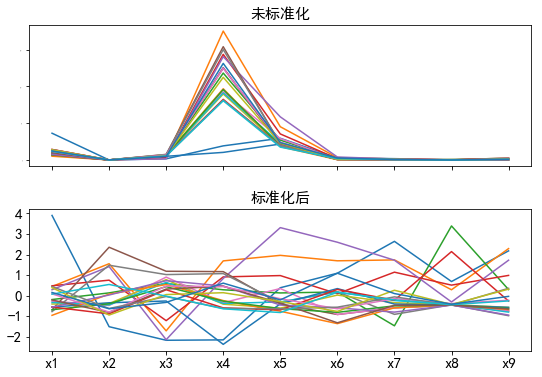

In [6]:
fig, ax = plt.subplots(2, 1,figsize=(9,6),sharex = True)
xticks = ['x'+ str(x) for x in range(0, 10)]
orig_data.T.plot(ax = ax[0], legend = False, fontsize = 1)                
                                                    #pandas的画图功能，可以不需要import matplotlib
ax[1].plot(data_scaled.T)
plt.yticks(fontsize = 15)
ax[0].set_title('未标准化', fontsize = 15)
ax[1].set_title('标准化后', fontsize = 15)
ax[1].set_xticklabels(xticks, fontsize = 15)
plt.subplots_adjust(hspace = 0.3)                   #调整subplot之间的间距

7、绘图与可视化——特征值及方差贡献率

Text(0.5,1,'累积方差贡献率')

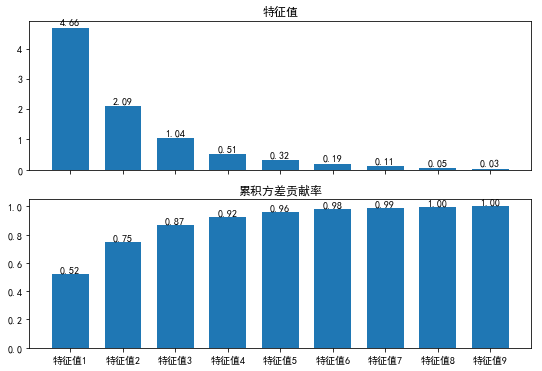

In [7]:
fig, ax = plt.subplots(2, 1,figsize=(9,6),sharex = True)
xticks = ['特征值'+ str(x) for x in range(1, 10)]
x_order = np.arange(9)
ax[0].bar(x_order, lamda_order, align = 'center', width = 0.7, tick_label = xticks)
ax[1].bar(x_order, s_contri, align = 'center', width = 0.7, tick_label = xticks)
for x, y1, y2 in zip(x_order,lamda_order,s_contri):
    ax[0].text(x - 0.2, y1 + 0.1, '%.2f' % y1)
    ax[1].text(x - 0.2, y2 + 0.01, '%.2f' % y2)
ax[0].set_title('特征值', fontsize = 12)
ax[1].set_title('累积方差贡献率', fontsize = 12)

8、绘图与可视化——三维观察

Text(0.5,0.92,'三维可视化')

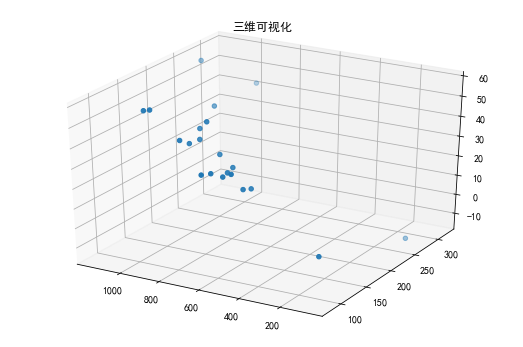

In [8]:
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Y[:, 1], Y[:, 0], Y[:, 2])       #为与matlab保持一致变换坐标轴
ax.invert_xaxis()
ax.set_title('三维可视化')

5、利用sklearn的PCA直接降维

In [11]:
k = 3
pca = PCA(n_components = k)               # 拟合数据，n_components定义要降的维度
z = pca.fit_transform(data_scaled)        # 需传入归一化后的数据
print(pca.components_.T)                  #主成分 P
# print(pca.explained_variance_)          #主成分对应特征值
# print(pca.explained_variance_ratio_)    #主成分对应贡献率
# print(pca.n_features_)                  #原属性数
# print(pca.n_components)                 #主成分数
print(z)                                  #P.dot(data.T).T

[[ 0.34212517  0.36793146 -0.05985275]
 [ 0.05718981 -0.61351174 -0.02759239]
 [-0.44639271 -0.06614096  0.09288246]
 [ 0.01928515 -0.60060577  0.0362499 ]
 [ 0.37648161 -0.30684276 -0.01065089]
 [ 0.37928162 -0.12405356  0.12219415]
 [ 0.43223408  0.09197443 -0.24614547]
 [ 0.09139644  0.06947418  0.94974992]
 [ 0.4463953   0.01732467  0.08976499]]
[ 4.66111835  2.08949227  1.04299402]
[ 0.51790204  0.23216581  0.11588822]
9
3
[[ 4.91278152  3.88073146 -0.14745134]
 [ 4.21856719 -2.28340792  0.06593089]
 [-0.39773321 -0.31641386  3.70284335]
 [ 2.14831742 -0.90424408  0.16249873]
 [ 4.87070933 -2.29141744 -0.50789546]
 [-1.74973101 -2.33915146 -0.33850818]
 [-1.38505588  0.25127176 -0.37419077]
 [-1.54360823 -1.96169518 -0.12442828]
 [-1.18556385  0.39956802 -0.28143881]
 [-0.98819916  0.35057673 -0.31604086]
 [-0.64103027  1.45288286 -0.41473823]
 [-1.97705068  0.01787808 -0.41314317]
 [-1.54514902  0.33286637 -0.38544844]
 [-0.5483717   0.98214113  2.17288017]
 [-1.72027711 -0.45827